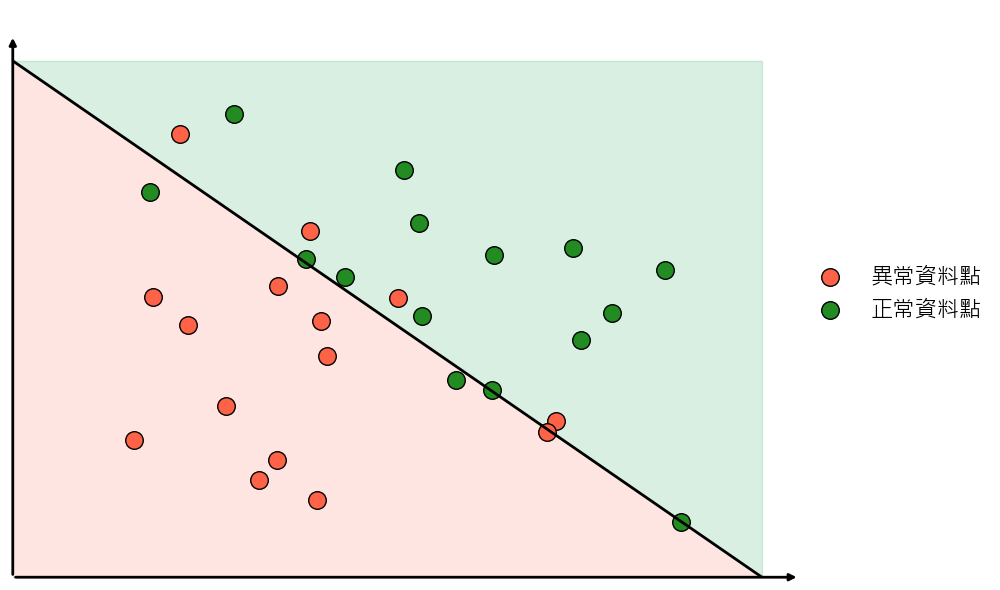

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 'Microsoft JhengHei'
# ------------------------------------------------------------
# 1. Toy data –‑ x = Income, y = Employment Duration
# ------------------------------------------------------------

# ------------------------------------------------------------------
# 1. Helper to generate N points that satisfy an arbitrary condition
# ------------------------------------------------------------------
def sample_points(cond, n, xlim=(1, 9), ylim=(1, 9), rng=None):
    """
    Rejection‑samples points until `n` of them satisfy `cond(x, y)`.
      cond  : function (vectorized) returning bool mask for x, y
      n     : number of accepted points to return
      xlim  : (xmin, xmax)
      ylim  : (ymin, ymax)
      rng   : np.random.Generator (optional)
    """
    if rng is None:
        rng = np.random.default_rng()
    accepted_x, accepted_y = [], []
    while len(accepted_x) < n:
        x_trial = rng.uniform(*xlim, size=n)    # draw a batch at once
        y_trial = rng.uniform(*ylim, size=n)
        mask    = cond(x_trial, y_trial)
        accepted_x.extend(x_trial[mask])
        accepted_y.extend(y_trial[mask])
    return np.column_stack([accepted_x[:n], accepted_y[:n]])

# ------------------------------------------------------------------
# 2. Define your two region constraints
# ------------------------------------------------------------------
cond_green   = lambda x, y: y > -x + 9      # region ABOVE  y = -x + 9
cond_red = lambda x, y: y < -x + 11       # region BELOW  y =  x + 11

# ------------------------------------------------------------------
# 3. Generate data
# ------------------------------------------------------------------
rng = np.random.default_rng(seed=2025)
red_pts   = sample_points(cond_red,   n=15, rng=rng)
green_pts = sample_points(cond_green, n=15,  rng=rng)
# ------------------------------------------------------------
# 2. Prepare the canvas
# ------------------------------------------------------------
fig, ax = plt.subplots(figsize=(10, 6))

# Decision boundary: y = −x + b
x_vals = np.linspace(0, 10, 200)
b = 10                           # vertical intercept — adjust to taste
boundary = -x_vals + b

# Shade the two half‑planes
ax.fill_between(x_vals, boundary, 10,  color='mediumseagreen', alpha=0.2)
ax.fill_between(x_vals, 0,        boundary, color='salmon',       alpha=0.2)

# Plot the decision line
ax.plot(x_vals, boundary, color='black', linewidth=2)

# ------------------------------------------------------------
# 3. Scatter the data points
# ------------------------------------------------------------
ax.scatter(red_pts[:, 0], red_pts[:, 1],
           s=160, color='tomato',  edgecolor='black', label='異常資料點')
ax.scatter(green_pts[:, 0],   green_pts[:, 1],
           s=160, color='forestgreen', edgecolor='black', label="正常資料點")

# ------------------------------------------------------------
# 4. Fancy axes with arrow heads
# ------------------------------------------------------------
ax.set_xlim(0, 11)
ax.set_ylim(0, 11)

# Hide the normal spines
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# Draw custom arrowed axes
arrow_props = dict(arrowstyle='-|>', linewidth=2, color='black')
ax.annotate('', xy=(10.5, 0), xytext=(0, 0), arrowprops=arrow_props)
ax.annotate('', xy=(0, 10.5), xytext=(0, 0), arrowprops=arrow_props)

# Ticks off
ax.set_xticks([])
ax.set_yticks([])


# Legend
ax.legend(frameon=False, fontsize=16, loc='center right', bbox_to_anchor=(1.2, 0.5))

plt.tight_layout()
plt.show()
